### 커널 PCA

In [1]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [4]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [5]:
# kernel PCA
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_tn_std)
X_tn_kpca = k_pca.transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std)

In [6]:
# 차원축소 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_tn_kpca.shape)

(133, 13)
(133, 2)


In [7]:
# 고유값 확인
print(k_pca.eigenvalues_)

[193.89824561 118.0368972 ]


In [8]:
# 고유벡터 확인
print(k_pca.eigenvectors_)

[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]
 [ 0.107761    0.08440051]
 

In [9]:
# 차원축소 이후 데이터셋
import pandas as pd
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca,
                            columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df.head(5)

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0


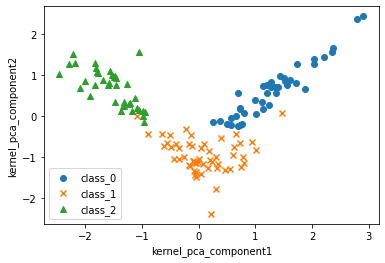

In [10]:
import matplotlib.pyplot as plt
df = X_tn_kpca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target']== i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
# 학습
clf_rf_kpca = RandomForestClassifier(max_depth=2,
                                     random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)

# 예측
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)

In [12]:
# PCA 적용 후 정확도
from sklearn.metrics import accuracy_score
accuracy_kpca = accuracy_score(y_te, pred_rf_kpca)
print(accuracy_kpca)

0.9555555555555556
